# MULTIPLE  REGRESSION & SUPERVISED CLASSIFICATION METHODS

##1. DATA PREPARATION:  CLEANING & ENRICHMENT

In [459]:
# imports
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl

# this allows plots to appear directly in the notebook
%matplotlib inline 

demo = pd.io.parsers.read_table('/Users/davidpena/Desktop/PosgradoUB/Proyecto/BBVA/demographic_distribution000', sep='\t', names =['zipcode','date','category','age','gender', 'merchants', 'cards','numpayments', 'avgpayment', 'max', 'min', 'std'])
print demo.shape
demo.head()

(48538, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
0,8001,2014-07-01,es_food,unknown,unknown,8,25,26,13.73,31.50,1.50,8.015002
1,8001,2014-07-24,es_transportation,unknown,unknown,12,59,60,16.12,92.00,1.25,17.882527
2,8001,2014-07-09,es_otherservices,unknown,unknown,12,64,64,43.42,275.00,4.10,52.466928
3,8001,2014-07-09,es_food,unknown,unknown,7,28,29,11.72,30.56,0.90,8.120161
4,8001,2014-07-25,es_barsandrestaurants,35-44,male,5,5,5,46.02,165.00,7.10,59.893586


In [460]:
#First glance to correlations 
#sns.corrplot(demo)

In [461]:
fashion = demo[demo.category=='es_fashion']
print 'Our data frame now have the following size: ', fashion.shape 
fashion.head()

Our data frame now have the following size:  (12315, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
7,8001,2014-07-27,es_fashion,unknown,unknown,5,38,39,24.26,87.31,7.99,15.135713
9,8001,2014-07-24,es_fashion,unknown,unknown,17,160,164,30.51,345.39,2.00,49.655736
20,8002,2014-07-04,es_fashion,35-44,male,5,5,5,44.89,85.00,9.95,27.541576
21,8002,2014-07-08,es_fashion,25-34,female,7,7,8,33.45,89.90,7.99,24.267551
23,8002,2014-07-23,es_fashion,35-44,female,7,7,7,58.46,117.60,13.35,39.195540


In [462]:
#For our prediction porpouse, we will have to take out 'unknown' raws

fashion = fashion[demo.age!='unknown']
fashion = fashion[demo.gender!='unknown']

print 'Our data frame now have the following size: ', fashion.shape 

fashion.head()


Our data frame now have the following size:  (8549, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
20,8002,2014-07-04,es_fashion,35-44,male,5,5,5,44.89,85.00,9.95,27.541576
21,8002,2014-07-08,es_fashion,25-34,female,7,7,8,33.45,89.90,7.99,24.267551
23,8002,2014-07-23,es_fashion,35-44,female,7,7,7,58.46,117.60,13.35,39.195540
24,8002,2014-07-01,es_fashion,25-34,female,12,17,21,30.03,82.95,9.99,19.302063
25,8002,2014-07-05,es_fashion,25-34,male,6,7,9,38.75,99.95,9.99,32.479977


In [463]:
#We still can take out some useless columns for our purpose
fashion= fashion.reindex(columns=['zipcode','date','age','gender','avgpayment'])

#We will also enrich our data frame with  the days of the week
day=pd.io.parsers.read_table('/Users/davidpena/Desktop/PosgradoUB/Proyecto/DiesSetmana.txt', sep='	', names =['date','day'])
fashion=pd.merge(fashion,day,on='date')
print fashion.day.unique()
fashion.head()

['V' 'M' 'X' 'S' 'J' 'D' 'L']


,zipcode,date,age,gender,avgpayment,day
0,8002,2014-07-04,35-44,male,44.89,V
1,8001,2014-07-04,25-34,male,35.48,V
2,8002,2014-07-04,25-34,male,57.45,V
3,8002,2014-07-04,25-34,male,31.40,V
4,8002,2014-07-04,25-34,female,56.15,V


In [464]:
#Let's see now the top 10 avgpayment by fashion's category and some other interesting facts. 

top_fashion= fashion.sort(columns='avgpayment', ascending= False)

print 'Top 10 average payment: '

top_fashion.head()


Top 10 average payment: 


,zipcode,date,age,gender,avgpayment,day
1126,8012,2014-07-01,45-54,female,411.40,M
4361,8010,2014-07-31,45-54,female,402.06,J
5699,8911,2014-07-19,45-54,female,387.01,S
6812,8007,2014-07-02,55-64,female,375.16,X
5458,8008,2014-07-19,35-44,female,369.48,S


In [465]:
print 'min: ', np.min(fashion['avgpayment'])
print 'mean:', np.mean(fashion['avgpayment'])
print 'median:',np.median(fashion['avgpayment'])
print 'max:', np.max(fashion['avgpayment'])

min:  8.13
mean: 41.9882793309
median: 37.09
max: 411.4


In [466]:
#Transforming categorical variables into "numerical" variables

dic= {'female':0, 'male':1}

dict2= {'<25':1, '25-34':2,'35-44':3, '45-54':4,'55-64':5, '>=65':6}

dict3= {'L':1, 'M':2, 'X':3, 'V':4, 'J':5, 'S':6, 'D':7}

In [467]:
fashion['gender'] = fashion.gender.map(dic)

fashion['age'] = fashion.age.map(dict2)

fashion['day'] = fashion.day.map(dict3)

fashion.head(5)


,zipcode,date,age,gender,avgpayment,day
0,8002,2014-07-04,3,1,44.89,4
1,8001,2014-07-04,2,1,35.48,4
2,8002,2014-07-04,2,1,57.45,4
3,8002,2014-07-04,2,1,31.40,4
4,8002,2014-07-04,2,0,56.15,4


In [153]:
#### fashion.to_csv("fashion", sep='\t',decimal='.', index=True)

## 2. REGRESSION MODELS

### 2.1 DECISIONTREE REGRESSION

In [468]:
#Now we will create our feature matrix and our "y" target.

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix
fashion.target= fashion.reindex(columns=['avgpayment']) #y

In [469]:
X,y = data, fashion.target
print X.shape, y.shape

(8549, 4) (8549, 1)


In [470]:
#Fit regression model

clf_1 = DecisionTreeRegressor(max_depth=10) 
clf_2 = DecisionTreeRegressor(max_depth=21)
clf_1.fit(X, np.ravel(y))
clf_2.fit(X, np.ravel(y))


DecisionTreeRegressor(criterion='mse', max_depth=21, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [472]:
print np.max(fashion.target), np.min(fashion.target), np.mean(fashion.target), np.median(fashion.target)

avgpayment    411.4
dtype: float64 avgpayment    8.13
dtype: float64 avgpayment    41.988279
dtype: float64 37.09


In [473]:
print clf_1.score(data, fashion.target) 
print clf_2.score(data, fashion.target) 

0.29490115927
0.36732869937


In [474]:
print 'Write your destination zipcode in here: ' 
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 ' 
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7), where 1= Monday to 7= sunday' 
d= input()



Write your destination zipcode in here: 
830
If you are Female press 0, if not press 1, otherwise choose whatever you want:
1
Select your age interval, where...
1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
1
Select the day of the week you want to go shopping (from 1 to 7), where 1= Monday to 7= sunday
5


In [475]:
result= [z,g,a,d]
print result

[830, 1, 1, 5]


In [476]:
# Predict
print clf_1.predict(result)
print clf_2.predict(result)

[ 43.35621212]
[ 56.12666667]


In [483]:
#We can observe how the same sample profile but diferent depth lead to different results:

print 'DT with depth = 10 :',clf_1.predict([8034,0,1,5]) 
print 'DT with depth = 21 :', clf_2.predict([8034,0,1,5]) 

DT with depth = 10 : [ 37.47917563]
DT with depth = 21 : [ 26.29]


In [1185]:
# Predicting all our df trained 

X_test = data

y_1 = clf_1.predict(X_test)

y_2 = clf_2.predict(X_test)

print y_1

print y_2


[ 46.64538462  43.35621212  43.35621212 ...,  41.66110778  41.66110778
  41.66110778]
[ 46.64538462  35.48        39.85285714 ...,  46.65428571  46.0056      46.0056    ]


In [489]:
#Scores

from sklearn import metrics

y_pred=clf_1.predict(X)
y_pred2=clf_2.predict(X)

print "Coefficient of determination clf_1:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"
print "Coefficient of determination clf_2:{0:.3f}".format(metrics.r2_score(y,y_pred2)),"\n"

Coefficient of determination clf_1:0.295 

Coefficient of determination clf_2:0.367 



### 2.2 RANDOM FOREST REGRESSION

In [490]:
from sklearn.ensemble.forest import RandomForestRegressor

#Fitting our RANDOM FOREST REGRESSION

rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=15)

rf.fit(X, np.ravel(y))



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [491]:
print "Coefficient of determination rf regression:", round(rf.score(data, fashion.target) ,4)

Coefficient of determination rf regression: 0.3463


In [492]:
print 'Write your destination zipcode in here: '  
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25:, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 '
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7)' 
d= input()

result= [z,g,a,d]

print '\t'

print 'Your avgpayment is:', round(rf.predict(result),2)

Write your destination zipcode in here: 
8024
If you are Female press 0, if not press 1, otherwise choose whatever you want:
0
Select your age interval, where...
1: <25:, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
3
Select the day of the week you want to go shopping (from 1 to 7)
1
	
Your avgpayment is: 38.62


In [500]:
print 'Custom data Example with both methods:' 

print round(clf_2.predict([17032,0,3,5]),2), 'Best DecisionTree' 

print round(rf.predict([17032,0,3,5]),2), 'Best RandomForest'



Custom data Example with both methods:
59.07 Best DecisionTree
45.16 Best RandomForest


###2.3 CROSS VALIDATION DECISIONTREE/RANDOMFOREST REGRESSORS

In [508]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle

X,y = data, np.ravel(fashion.target)
print 'Feature Matrix (X):', X.shape,'//', 'Target (Y):',y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=33)
print '\t'

print 'TRAIN SHAPE-->', 'X:', X_train.shape,'//', 'Y:', y_train.shape #(modelo lineal con 4 variables)
print 'TEST SHAPE-->', 'X:',X_test.shape,'//','Y:', y_test.shape

Feature Matrix (X): (8549, 4) // Target (Y): (8549,)
	
TRAIN SHAPE--> X: (2564, 4) // Y: (2564,)
TEST SHAPE--> X: (5985, 4) // Y: (5985,)


In [510]:
DT = clf_1

DT.fit(X_train, y_train)

# Best possible score is 1.0, lower values are worse.

print 'DECISION TREE REGRESSION:',"\n"

print 'Test Score:', round(DT.score(X_test, y_test),4)
print 'Train Score:', round(DT.score(X_train, y_train),4) 

print '\t'
print 'Training MSE: ', round(np.mean((DT.predict(X_train) - y_train)**2),2)
print 'Test MSE: ', round(np.mean((DT.predict(X_test) - y_test)**2),2)

print '\t'

print 'RANDOM FOREST REGRESSION:',"\n"
print 'Test Score:', round(rf.score(X_test, y_test),4)
print 'Train Score:', round(rf.score(X_train, y_train),4)
print '\t'                          
print 'Training MSE: ', round(np.mean((rf.predict(X_train) - y_train)**2),2)
print 'Test MSE: ', round(np.mean((rf.predict(X_test) - y_test)**2),2)

DECISION TREE REGRESSION: 

Test Score: -0.149
Train Score: 0.4934
	
Training MSE:  268.24
Test MSE:  559.11
	
RANDOM FOREST REGRESSION: 

Test Score: 0.3231
Train Score: 0.3951
	
Training MSE:  320.34
Test MSE:  329.39


##3. CLASSIFICATION METHODS

### 3.1 DECISION TREE CLASSIFIER

In [511]:
#Reset workspace*
%reset -f

In [512]:
# imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import kde
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline 

#Recovering our fashion df
fashion= pd.io.parsers.read_table('fashion',sep='\t', index_col=0)

In [513]:
#Statistics
print 'min: ', np.min(fashion['avgpayment'])
print 'mean:', np.mean(fashion['avgpayment'])
print 'median:',np.median(fashion['avgpayment'])
print 'max:', np.max(fashion['avgpayment'])

min:  8.13
mean: 41.9882793309
median: 37.09
max: 411.4


In [514]:
#Defining boundaries for categorization

sigma3= (np.mean(fashion['avgpayment']) + 3*np.std(fashion['avgpayment']))

minim= np.min(fashion['avgpayment'])

print 'With the 3 sigma rule (99.73%),  we will consider the following ranges:'

print '[', minim ,',', round(sigma3,2),']'

print '\t'

numcategories= 3 #We will differenciate 3 categories (Low, Medium &  High average payment)

interval= round(((sigma3)/numcategories),2)

print 'We want 3 intervals, so we will split every', interval

With the 3 sigma rule (99.73%),  we will consider the following ranges:
[ 8.13 , 109.05 ]
	
We want 3 intervals, so we will split every 36.35


In [515]:
fashion=fashion.reindex(columns=['zipcode','gender','age','day','avgpayment','clas'])

#Transforming output (y) into a class

condition1= fashion['avgpayment'] <=  interval
condition2 = (fashion['avgpayment'] > interval) & (fashion['avgpayment'] <= (interval*2))
condition3 = (fashion['avgpayment'] > interval*2) & (fashion['avgpayment'] <= sigma3)
condition4 = (fashion['avgpayment'] > sigma3)

fashion.loc[condition1, 'clas'] = 'Low [<= 39 eur]'
fashion.loc[condition2, 'clas'] = 'Medium [>39 to 67 eur]'
fashion.loc[condition3, 'clas'] = 'High [>67 eur]'
fashion.loc[condition4, 'clas'] = 'DROP'

fashion= fashion[fashion.clas!='DROP']

print fashion.shape
fashion.head(5)

(8416, 6)


,zipcode,gender,age,day,avgpayment,clas
0,8002,1,3,4,44.89,Medium [>39 to 67 eur]
1,8001,1,2,4,35.48,Low [<= 39 eur]
2,8002,1,2,4,57.45,Medium [>39 to 67 eur]
3,8002,1,2,4,31.40,Low [<= 39 eur]
4,8002,0,2,4,56.15,Medium [>39 to 67 eur]


In [516]:
#feature matrix & target

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix

fashion_target= fashion.reindex(columns=['avgpayment','clas']) #y

fashion_target.head()

,avgpayment,clas
0,44.89,Medium [>39 to 67 eur]
1,35.48,Low [<= 39 eur]
2,57.45,Medium [>39 to 67 eur]
3,31.40,Low [<= 39 eur]
4,56.15,Medium [>39 to 67 eur]


In [517]:
l= fashion_target

low = l[(l['avgpayment']<= interval)]
medium = l[(l['avgpayment']>interval) & (l['avgpayment']<=2*interval)]
high = l[(l['avgpayment']>2*interval)]

print 'Low:', low.shape
print 'Medium:', medium.shape
print 'High:', high.shape


print 'Total:', data.shape

coeflow= float(len(low)) / float(len(fashion))

coefmedium= float(len(medium)) / float(len(fashion))

coefhigh= float(len(high)) / float(len(fashion))

print '\t'

print 'Low coef:', round (coeflow,4)
print 'Medium coef:', round (coefmedium,4)
print 'High coef: ', round(coefhigh,4)


Low: (4098, 2)
Medium: (3925, 2)
High: (393, 2)
Total: (8416, 4)
	
Low coef: 0.4869
Medium coef: 0.4664
High coef:  0.0467


In [518]:
# we dont need numbers since we have already split it in categories

fashion_class= fashion_target.drop('avgpayment', 1) #Drop numeric column

fashion_class.head() # y by categories


,clas
0,Medium [>39 to 67 eur]
1,Low [<= 39 eur]
2,Medium [>39 to 67 eur]
3,Low [<= 39 eur]
4,Medium [>39 to 67 eur]


In [412]:
data.head() #our X categorical variables 

,zipcode,gender,age,day
0,8002,1,3,4
1,8001,1,2,4
2,8002,1,2,4
3,8002,1,2,4
4,8002,0,2,4


In [519]:
from IPython.html.widgets import interact
from sklearn import metrics

#fitting
from sklearn import tree

X = data
y = fashion_class
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(X, y)


In [520]:
print 'Write your destination zipcode in here: ' 
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 ' 
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7)' 
d= input()


Write your destination zipcode in here: 
8010
If you are Female press 0, if not press 1, otherwise choose whatever you want:
0
Select your age interval, where...
1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
2
Select the day of the week you want to go shopping (from 1 to 7)
5


In [524]:
# Predict 
result= [z,g,a,d]

you= clf_dt.predict(result) 

against= clf_dt.predict([8032,0,2,5]) 

print 'Your average payment is:', you, '08018 --> Glories'

print 'The profile compared to you has an average payment:', against, '08032 --> Carmel/Horta'


Your average payment is: ['High [>67 eur]'] 08018 --> Glories
The profile compared to you has an average payment: ['Low [<= 39 eur]'] 08032 --> Carmel/Horta


In [522]:
score1= clf_dt.score(data,np.ravel(fashion_class))

print round(score1,4), '--> DECISIONTREE SCORE'

0.6724 --> DECISIONTREE SCORE


In [525]:
#Export Tree
import os
dotfile = tree.export_graphviz(clf_dt, out_file = "fashiontree.dot")

os.system("dot -Tpng fashiontree.dot -o fashiontree.png")

32512

In [419]:
from IPython.core.display import Image
Image("fashiontree.png")

#### Before considering any cross validation,  we will create another predictor based on Random Forest algorithm and we will compare them

### 3.2 RANDOM FOREST CLASSIFIER

In [526]:
from sklearn.ensemble.forest import RandomForestClassifier

#Fitting our RANDOM FOREST REGRESSION

clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=20)

clf_rf.fit(X, np.ravel(y))



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [536]:
# Predict
result= [z,g,a,d]

you= clf_rf .predict(result) 

against= clf_rf .predict([8040,0,2,5]) 

print 'Your average payment is:', you

print 'The profile compared to you has an average payment:', against

Your average payment is: ['Medium [>39 to 67 eur]']
The profile compared to you has an average payment: ['Low [<= 39 eur]']


In [537]:
score2= clf_rf.score(data,fashion_class)

print round(score1,4), '--> DECISIONTREE SCORE'
print round(score2,4), '--> RANDOM FOREST SCORE'

0.6724 --> DECISIONTREE SCORE
0.6715 --> RANDOM FOREST SCORE


### 3.3 CROSS VALIDATION DECISIONTREE & RANDOM FOREST

In [538]:
from sklearn import *


In [539]:
#feature matrix & target

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix

data.head()

,zipcode,gender,age,day
0,8002,1,3,4
1,8001,1,2,4
2,8002,1,2,4
3,8002,1,2,4
4,8002,0,2,4


In [542]:
#We are gonna split Train & Tests
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, fashion_class, test_size=0.7, random_state=13)

In [543]:
X,y = data, np.ravel(fashion_class)
print 'Feature Matrix (X):', X.shape,'//', 'Target (Y):',y.shape

print '\t'

print 'TRAIN SHAPE-->', 'X:', X_train.shape,'//', 'Y:', y_train.shape #(modelo lineal con 4 variables)
print 'TEST SHAPE-->', 'X:',X_test.shape,'//','Y:', y_test.shape

print '\t'

print 'DECISIONTREE VS RANDOM FOREST CLASSIFIER (FASHION CATEGORY):'

print '\t'

#Fitting our DECISION TREE & RANDOM FOREST CLASSIFIERS WITH TRAINING DATA


clf_dt = tree.DecisionTreeClassifier(max_depth=6)
clf_dt = clf_dt.fit(X_train, np.ravel(y_train)) 

clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=19)

clf_rf.fit(X_train, np.ravel(y_train))  

# Best possible score is 1.0, lower values are worse.

#dt
print 'DecisionTree - Train Score:', clf_dt.score(X_train, y_train)
print 'DecisionTree - Test Score:', clf_dt.score(X_test, y_test)

print '\t'

#rf
print 'RandomForest - Train Score:', clf_rf.score(X_train, y_train) 
print 'RandomForest - Test Score:', clf_rf.score(X_test, y_test) 


Feature Matrix (X): (8416, 4) // Target (Y): (8416,)
	
TRAIN SHAPE--> X: (2524, 4) // Y: (2524, 1)
TEST SHAPE--> X: (5892, 4) // Y: (5892, 1)
	
DECISIONTREE VS RANDOM FOREST CLASSIFIER (FASHION CATEGORY):
	
DecisionTree - Train Score: 0.598652931854
DecisionTree - Test Score: 0.557875084861
	
RandomForest - Train Score: 0.740095087163
RandomForest - Test Score: 0.542090970808


In [544]:
from sklearn.cross_validation import * #validation strategy
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)
    
    # create a K-FOLD CROSS VALIDATION iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv) #(...,cv=cv) ponmelo en orden de cv
    
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)


In [545]:

train_and_evaluate(clf_dt,X_train,np.ravel(y_train))

'''clf_dt = tree.DecisionTreeClassifier(max_depth=6)'''


Coefficient of determination on training set: 0.598652931854
Average coefficient of determination using 5-fold crossvalidation: 0.555078579287


'clf_dt = tree.DecisionTreeClassifier(max_depth=6)'

In [430]:
train_and_evaluate(clf_rf,X_train,np.ravel(y_train))



'''clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=19)'''


Coefficient of determination on training set: 0.742868462758
Average coefficient of determination using 5-fold crossvalidation: 0.538434700613


"clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,\n           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,\n           min_samples_split=2,n_estimators=19)"

In [451]:
def measure_performance(X,y,clf_rf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf_rf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report: #excepto cofficient of determination el resto son para clasificadores
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"

###DECISIONTREE CONFUSION MATRIX & PERFORMANCE MESURES

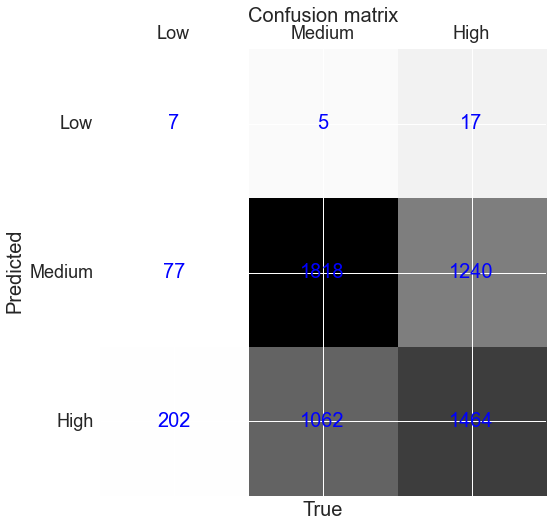

Evaluation decison tree test set:  
	
Accuracy:0.558 

Classification report
             precision    recall  f1-score   support

High [>67 eur]       0.24      0.02      0.04       286
Low [<= 39 eur]       0.58      0.63      0.60      2885
Medium [>39 to 67 eur]       0.54      0.54      0.54      2721

avg / total       0.54      0.56      0.55      5892




In [432]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

y_pred= clf_dt.predict(X_test)

def draw_confusion(y_test,y_pred,labels):
    cm = metrics.confusion_matrix(y_test,  y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=18)
    ax.set_yticklabels([''] + labels, size=18)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in xrange(3):
        for j in xrange(3):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='blue',size=20)
    fig.set_size_inches(8,8)
    plt.show()
    
    
draw_confusion(y_test, y_pred ,['Low', 'Medium','High'])

print 'Evaluation decison tree test set:  '   
print '\t'

measure_performance(X_test,y_test,clf_dt, show_accuracy=True, \
                    show_classification_report=True,show_confusion_matrix=False, show_r2_score=False)



###RANDOM FOREST CONFUSION MATRIX & PERFORMANCE MESUREMENT

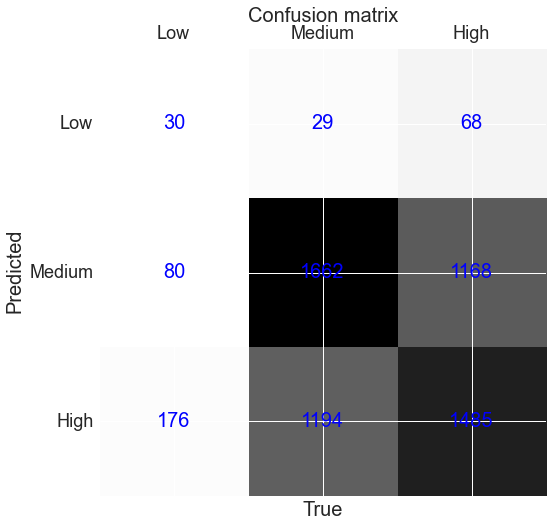

Evaluation random forest test set:  
	
Accuracy:0.539 

Classification report
             precision    recall  f1-score   support

High [>67 eur]       0.24      0.10      0.15       286
Low [<= 39 eur]       0.57      0.58      0.57      2885
Medium [>39 to 67 eur]       0.52      0.55      0.53      2721

avg / total       0.53      0.54      0.53      5892




In [452]:
y_pred= clf_rf.predict(X_test)

draw_confusion(y_test, y_pred,['Low', 'Medium','High'])

print 'Evaluation random forest test set:  '   
print '\t'
       
measure_performance(X_test,y_test,clf_rf, show_accuracy=True, \
                    show_classification_report=True,show_confusion_matrix=False, show_r2_score=False)


###FEATURE SELECTION 

In [454]:
feature_names= data[['zipcode','gender','age','day']]

from sklearn.feature_selection import *

fs=SelectKBest(score_func=f_classif,k=3) #Select the best 3 features

X_new_train=fs.fit_transform(X_train,np.ravel(y_train))
X_new_test=fs.fit_transform(X_test,np.ravel(y_test))

print 'Features considered: ', zip(fs.get_support(),feature_names) # Show the selected features

print '\t'

print 'Original test shape:', X_test.shape
print 'Original train shape:', X_train.shape

print '\t'

print 'New train shape:', X_new_train.shape
print 'New test shape:', X_new_test.shape



Features considered:  [(True, 'zipcode'), (True, 'gender'), (True, 'age'), (False, 'day')]
	
Original test shape: (5892, 4)
Original train shape: (2524, 4)
	
New train shape: (2524, 3)
New test shape: (5892, 3)


In [449]:
#Fitting with the best k=3 features insted of k=4

clf_fs = RandomForestClassifier() #tree.DecisionTreeClassifier() or RandomForestClassifier()

clf_fs = clf_fs.fit(X_new_train, np.ravel(y_train)) 


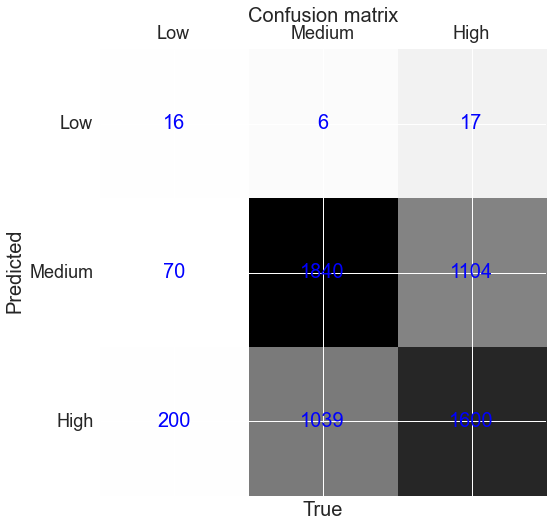

Evaluation random forest test set:  
	
Accuracy:0.587 

Classification report
             precision    recall  f1-score   support

High [>67 eur]       0.41      0.06      0.10       286
Low [<= 39 eur]       0.61      0.64      0.62      2885
Medium [>39 to 67 eur]       0.56      0.59      0.58      2721

avg / total       0.58      0.59      0.58      5892




In [450]:
y_pred= clf_fs.predict(X_new_test)

draw_confusion(y_test, y_pred,['Low', 'Medium','High'])

print 'Evaluation random forest test set:  '   
print '\t'
       
measure_performance(X_new_test,y_test,clf_fs, show_accuracy=True, \
                    show_classification_report=True,show_confusion_matrix=False, show_r2_score=False)


The matrix is divided in four quarters and contains

+ True Positives (TP): Positive samples predicted as such.
+ True Negatives (TN): Negative samples predicted as such.
+ False Positives (FP): Negative samples predicted as positive.
+ False Negatives (FN): Positive samples predicted as negative.

The combination of these elements allows to define several performance metrics:

+ Accuracy: 

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

Column-wise we find these two partial performance metrics:

+ Sensitivity or Recall: 

$$\text{sensitivity}=\frac{\text{TP}}{\text{Real Positives}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Specificity:

$$\text{specificity}=\frac{\text{TN}}{\text{Real Negatives}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

Row-wise we find these two partial performance metrics:

+ Precision or Positive Predictive Value:

$$\text{precision}=\frac{\text{TP}}{\text{Predicted Positives}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Negative predictive value:

$$\text{NPV}=\frac{\text{TN}}{\text{Predicted Negative}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$

The concept of positive and negative samples is purely arbitrary, thus we really have to remember the concepts of precision/positive predictive value and sensitivity/recall. 

##4. CONCLUSIONS

+ Adapting raw data into some predictor models is not always straightforward (p.e. Categorical variables do not fit properly in the LinearRegression() model provided by sklearn, just if you transform them into binary variables)


+ Regressors are not so efficient if we apply just a few categorical variables, specially if they are not strongly correlated with our target


+ Altough our classifiers lead to an interval average payment and not to an specific number, they give a sustancial better score